# Bussiness Case -: Prediction of Chance of Admit in a college

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
data = pd.read_excel(r'C:\Users\LENOVO\Desktop\01st March-20220314T155251Z-001\Data sets\Admission_Prediction.xlsx')

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


## Basic Checks of Data

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [5]:
data.dtypes

Serial No.           float64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research             float64
Chance of Admit      float64
dtype: object

Observation-:
1. It seems all the columns are numerical. Therefore no label encoding required

In [6]:
data.shape

(500, 9)

Observation-:
1. There are 500 observations and 9 columns.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    float64
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    float64
 8   Chance of Admit    500 non-null    float64
dtypes: float64(9)
memory usage: 35.3 KB


Observation-:
1. There are null values in columns - GRE Score, TOEFL Score, University Rating <br>
2. Also, don't have any object column so no label encoding is required

In [8]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

#### Statistical Analysis of Data

In [9]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Observation-:
1. Mean and Median are same. so it seems like all the columns are NORMAL DISTRIBUTION.
2. It can be seen that GRE Score varies from 290 to 340 with TOEFL Score ranging from 92 to 120 with SOP & LOP ranging from 1 to 5 

### Domain Analysis

Findings-:
1. As the GRE Score increases the Chance of Admit also increases
2. As the TOEFL Score increases the Chance of Admit also increases
3. As the SOP(statement of Personality) increases the chance of Admit also increases
4. As the LOR(Letter of Recommendation) increases the chance of Admit also increases
5. As the CGPA(Cumulative Grade Point Average) increases the Chance of Admit also increases

#### Univariant Analysis - GRE Score

Numerical Analysis

In [10]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [11]:
data['GRE Score'].max()

340.0

In [12]:
data['GRE Score'].min()

290.0

In [13]:
data['GRE Score'].unique()

array([337., 324.,  nan, 322., 314., 330., 321., 308., 302., 323., 325.,
       327., 307., 311., 317., 319., 318., 303., 312., 328., 336., 340.,
       298., 295., 310., 300., 338., 331., 320., 304., 316., 313., 332.,
       326., 329., 339., 334., 309., 315., 301., 296., 294., 299., 306.,
       305., 290., 335., 333., 297., 293.])

In [14]:
data['GRE Score'].nunique()

49

In [15]:
data['GRE Score'].value_counts()

312.0    22
324.0    22
322.0    17
321.0    17
316.0    17
327.0    17
314.0    16
320.0    16
311.0    16
325.0    15
317.0    15
315.0    13
308.0    13
326.0    12
313.0    12
300.0    12
323.0    12
318.0    12
319.0    12
305.0    11
304.0    11
310.0    10
329.0    10
307.0    10
298.0    10
301.0    10
331.0     9
340.0     9
299.0     8
330.0     8
328.0     8
309.0     8
332.0     7
334.0     7
306.0     7
297.0     6
302.0     6
296.0     5
295.0     5
336.0     5
303.0     5
338.0     4
335.0     4
333.0     4
339.0     3
337.0     2
290.0     2
294.0     2
293.0     1
Name: GRE Score, dtype: int64

Observation-:
1. GRE Score max and min values are - 340 & 290
2. GRE Score has 49 unique values
3. GRE Score with max and min value counts are -:<br>
   a. 312 = 12 nos
   b. 293 = 01 nos

Statistical Analysis

In [16]:
sp.mean(data['GRE Score'])
print('The mean of GRE Score is:',sp.mean(data['GRE Score']))

The mean of GRE Score is: 316.55876288659795


In [17]:
sp.median(data['GRE Score'])
print('The median of GRE Score is:',sp.median(data['GRE Score']))

The median of GRE Score is: nan


In [18]:
st.mode(data['GRE Score'])
print('The median of GRE Score is:',st.mode(data['GRE Score']))

The median of GRE Score is: ModeResult(mode=array([312.]), count=array([22]))


In [19]:
sp.std(data['GRE Score'])
print('The Standard Deviation of GRE Score is:',sp.std(data['GRE Score']))

The Standard Deviation of GRE Score is: 11.263074899933375


In [243]:
## Checking the Empirical Rule
data[(data['GRE Score'] >= 282) & (data['GRE Score'] <= 350)] 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,317.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [247]:
## percentage of data within mean +- 3 std is 100 % and it should be atleast 99.7 %
## Therefore it is following the empirical rule

In [22]:
sp.var(data['GRE Score'])
print('The Variation of GRE Score is:',sp.var(data['GRE Score']))

The Variation of GRE Score is: 126.8568562015092


In [23]:
st.skew(data['GRE Score'])

nan

In [24]:
data['GRE Score'].skew()
print('The skewness of GRE Score is:',data['GRE Score'].skew())

The skewness of GRE Score is: -0.05168658259225668


In [25]:
st.kurtosis(data['GRE Score'])
print('The kurtosis of GRE Score is:',st.kurtosis(data['GRE Score']))

The kurtosis of GRE Score is: nan


In [26]:
data['GRE Score'].kurtosis()
print('The kurtosis of GRE Score is:',data['GRE Score'].kurtosis())

The kurtosis of GRE Score is: -0.6844666910528896


Obervations-:
1. The skewness and kurtosis is within range. Therefore it is Normally Distributed data
2. mean = 316.55, median = nan, mode = 312
3. As the 100% data lies between mean +- 3 std. therefore it follows the Empirical Rule

Graphical Analysis

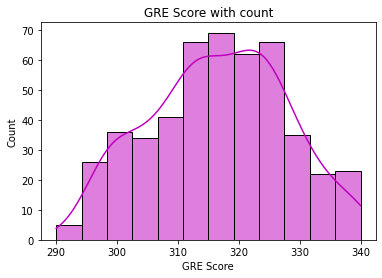

In [27]:
sns.histplot(x='GRE Score', data=data, kde=True, color='m')
plt.title('GRE Score with count')
plt.show()

Obervations-:

1. It is a normally Distributed curve
2. maximum count is between GRE Score 310 & 330

#### Univariant Analysis - TOEFL Score

Numerical Analysis

In [28]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [29]:
data['TOEFL Score'].max()

120.0

In [30]:
data['TOEFL Score'].min()

92.0

In [31]:
data['TOEFL Score'].unique()

array([118., 107., 104., 110., 103., 115., 109., 101., 102., 108., 106.,
       111., 112., 105., 114., 116., 119., 120.,  98.,  93.,  99.,  97.,
       117., 113., 100.,  nan,  95.,  96.,  94.,  92.])

In [32]:
data['TOEFL Score'].nunique()

29

In [33]:
data['TOEFL Score'].value_counts()

110.0    42
105.0    37
104.0    29
107.0    28
112.0    27
106.0    26
103.0    25
100.0    24
102.0    24
99.0     22
111.0    20
101.0    19
114.0    18
108.0    18
109.0    18
113.0    18
116.0    16
115.0    11
118.0    10
98.0     10
119.0    10
120.0     9
117.0     8
97.0      7
96.0      6
95.0      3
93.0      2
94.0      2
92.0      1
Name: TOEFL Score, dtype: int64

Observation-:

1. TOEFL Score max and min values are -: 120 & 92
2. TOEFL Score has 29 unique values
3. TOEFL Score with max and min value counts are -:
    a. 110 = 42 nos b. 92 = 01 nos

Statistical Analysis

In [34]:
sp.mean(data['TOEFL Score'])
print('The mean of TOEFL Score is:',sp.mean(data['TOEFL Score']))

The mean of TOEFL Score is: 107.18775510204081


In [35]:
sp.median(data['TOEFL Score'])
print('The median of TOEFL Score is:',sp.median(data['TOEFL Score']))

The median of TOEFL Score is: nan


In [36]:
st.mode(data['TOEFL Score'])
print('The median of TOEFL Score is:',st.mode(data['TOEFL Score']))

The median of TOEFL Score is: ModeResult(mode=array([110.]), count=array([42]))


In [37]:
sp.std(data['TOEFL Score'])
print('The Standard Deviation of TOEFL Score is:',sp.std(data['TOEFL Score']))

The Standard Deviation of TOEFL Score is: 6.106658548985898


In [38]:
## Checking the Empirical Rule
data[(data['TOEFL Score'] >= 88.6) & (data['TOEFL Score'] <= 126)] 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [39]:
# Observation
## 100% data lies between mean +- 3 std
## Therefore it follows the Empirical Rule

In [40]:
sp.var(data['TOEFL Score'])
print('The Variation of TOEFL Score is:',sp.var(data['TOEFL Score']))

The Variation of TOEFL Score is: 37.29127863390255


In [41]:
st.skew(data['TOEFL Score'])

nan

In [42]:
data['TOEFL Score'].skew()
print('The skewness of TOEFL Score is:',data['TOEFL Score'].skew())

The skewness of TOEFL Score is: 0.10206773213506315


In [43]:
st.kurtosis(data['TOEFL Score'])
print('The kurtosis of TOEFL Score is:',st.kurtosis(data['TOEFL Score']))

The kurtosis of TOEFL Score is: nan


In [44]:
data['TOEFL Score'].kurtosis()
print('The kurtosis of TOEFL Score is:',data['TOEFL Score'].kurtosis())

The kurtosis of TOEFL Score is: -0.6645653662677176


Obervations-:

1. The skewness and kurtosis is within range. Therefore it is Normally Distributed data <br>
2. mean = 107.18, median = nan, mode = 110 <br>
3. As the 100% data lies between mean +- 3 std. therefore it follows the Empirical Rule

Graphical Analysis

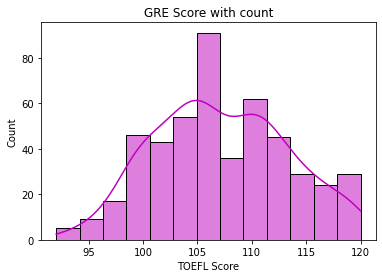

In [45]:
sns.histplot(x='TOEFL Score', data=data, kde=True, color='m')
plt.title('GRE Score with count')
plt.show()

Obervations-:

1. It is a normally Distributed curve
2. maximum count is between TOEFL Score 105 & 110

#### Univariant Analysis - SOP

Numerical Analysis

In [46]:
data['SOP'].max()

5.0

In [47]:
data['SOP'].min()

1.0

In [48]:
data['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [49]:
data['SOP'].nunique()

9

In [50]:
data['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

Statistical Analysis

In [51]:
sp.mean(data['SOP'])
print('The mean of SOP is:',sp.mean(data['SOP']))

The mean of SOP is: 3.374


In [52]:
sp.median(data['SOP'])
print('The median of SOP is:',sp.median(data['SOP']))

The median of SOP is: 3.5


In [53]:
st.mode(data['SOP'])
print('The median of SOP is:',st.mode(data['SOP']))

The median of SOP is: ModeResult(mode=array([4.]), count=array([89]))


In [54]:
sp.std(data['SOP'])
print('The Standard Deviation ofSOP is:',sp.std(data['SOP']))

The Standard Deviation ofSOP is: 0.9900121211379178


In [55]:
## Checking the Empirical Rule
data[(data['SOP'] >= 0.3) & (data['SOP'] <= 6)] 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


In [56]:
sp.var(data['SOP'])
print('The Variation of SOP is:',sp.var(data['SOP']))

The Variation of SOP is: 0.9801239999999993


In [57]:
data['SOP'].skew()
print('The skewness of SOP is:',data['SOP'].skew())

The skewness of SOP is: -0.22897239628779945


In [58]:
data['SOP'].kurtosis()
print('The kurtosis of SOP is:',data['SOP'].kurtosis())

The kurtosis of SOP is: -0.7057169536396795


Obervations-:

1. The skewness and kurtosis is within range. Therefore it is Normally Distributed data <br>
2. mean = 3.374, median = 3.5, mode = 4.0 <br>
3. As the 100% data lies between mean +- 3 std. therefore it follows the Empirical Rule

Graphical Analysis

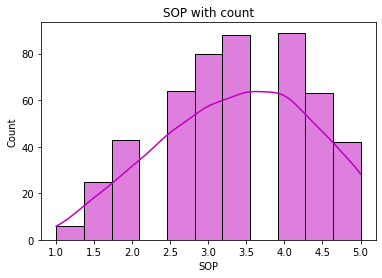

In [59]:
sns.histplot(x='SOP', data=data, kde=True, color='m')
plt.title('SOP with count')
plt.show()

Obervations-:

1. It is a normally Distributed curve
2. maximum count of SOP is between 3.0 & 4.5

#### Univariant Analysis - LOR

Numerical Analysis

In [60]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [61]:
data['LOR'].max()

5.0

In [62]:
data['LOR'].min()

1.0

In [63]:
data['LOR'].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [64]:
data['LOR'].nunique()

9

In [65]:
data['LOR'].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

Observation-:

1. LOR max and min values are -: 5.0 & 1.0
2. LOR has 9 unique values
3. LOR with max and min value counts are -: a. 3.0 = 99 nos b. 1.0 = 01 nos

Statistical Analysis

In [66]:
sp.mean(data['LOR'])
print('The mean of LOR is:',sp.mean(data['LOR']))

The mean of LOR is: 3.484


In [67]:
sp.median(data['LOR'])
print('The median of LOR is:',sp.median(data['LOR']))

The median of LOR is: 3.5


In [68]:
st.mode(data['LOR'])
print('The median of LOR is:',st.mode(data['LOR']))

The median of LOR is: ModeResult(mode=array([3.]), count=array([99]))


In [69]:
sp.std(data['LOR'])
print('The Standard Deviation of LOR is:',sp.std(data['LOR']))

The Standard Deviation of LOR is: 0.9245236611358293


In [70]:
sp.var(data['LOR'])
print('The Variation of LOR is:',sp.var(data['LOR']))

The Variation of LOR is: 0.8547439999999977


In [71]:
data['LOR'].skew()
print('The skewness of LOR is:',data['LOR'].skew())

The skewness of LOR is: -0.1452903146082398


In [72]:
data['LOR'].kurtosis()
print('The kurtosis of LOR is:',data['LOR'].kurtosis())

The kurtosis of LOR is: -0.7457485105986423


Obervations-:

1. The skewness and kurtosis is within range. Therefore it is Normally Distributed data <br>
2. mean = 3.484, median = 3.5, mode = 0.924 <br>
3. As the 100% data lies between mean +- 3 std. therefore it follows the Empirical Rule

Graphical Analysis

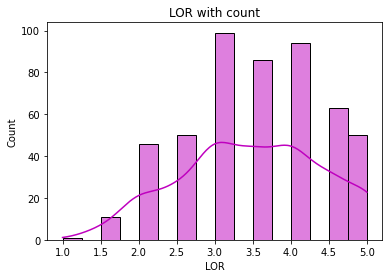

In [73]:
sns.histplot(x='LOR', data=data, kde=True, color='m')
plt.title('LOR with count')
plt.show()

Obervations-:

1. It is a normally Distributed curve
2. maximum count of LOR is between 3.0 & 4.5

#### Univariant Analysis - CGPA

Numerical Analysis

In [74]:
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [75]:
data['CGPA'].max()

9.92

In [76]:
data['CGPA'].min()

6.8

In [77]:
data['CGPA'].unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

In [78]:
data['CGPA'].nunique()

184

In [79]:
data['CGPA'].value_counts()

8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
       ..
9.92    1
9.35    1
8.71    1
9.32    1
7.69    1
Name: CGPA, Length: 184, dtype: int64

In [80]:
data['CGPA'].dtypes

dtype('float64')

Statistical Analysis

In [81]:
sp.mean(data['CGPA'])
print('The mean of CGPA is:',sp.mean(data['CGPA']))

The mean of CGPA is: 8.576440000000003


In [82]:
sp.median(data['CGPA'])
print('The median of CGPA is:',sp.median(data['CGPA']))

The median of CGPA is: 8.56


In [83]:
st.mode(data['CGPA'])
print('The median of CGPA is:',st.mode(data['CGPA']))

The median of CGPA is: ModeResult(mode=array([8.]), count=array([9]))


In [84]:
sp.std(data['CGPA'])
print('The Standard Deviation of CGPA is:',sp.std(data['CGPA']))

The Standard Deviation of CGPA is: 0.6042076848236868


In [85]:
sp.var(data['CGPA'])
print('The Variation of CGPA is:',sp.var(data['CGPA']))

The Variation of CGPA is: 0.36506692639999966


In [86]:
data['CGPA'].skew()
print('The skewness of CGPA is:',data['CGPA'].skew())

The skewness of CGPA is: -0.026612517318359303


In [87]:
data['CGPA'].kurtosis()
print('The kurtosis of CGPA is:',data['CGPA'].kurtosis())

The kurtosis of CGPA is: -0.5612783980560527


Obervations-:

1. The skewness and kurtosis is within range. Therefore it is Normally Distributed data <br>
2. mean = 8.57, median = 8.56, mode = 8 <br>
3. As the 100% data lies between mean +- 3 std. therefore it follows the Empirical Rule

### Bi Variant & Multi Variant Analysis

In [88]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76


Analysis between GRE Score and Chance of Admit with considering Research and University Rating factors

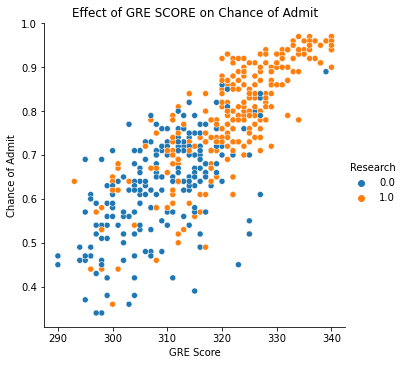

In [117]:
sns.relplot(x='GRE Score', y='Chance of Admit', hue= 'Research', data=data)
plt.title('Effect of GRE SCORE on Chance of Admit')
plt.show()

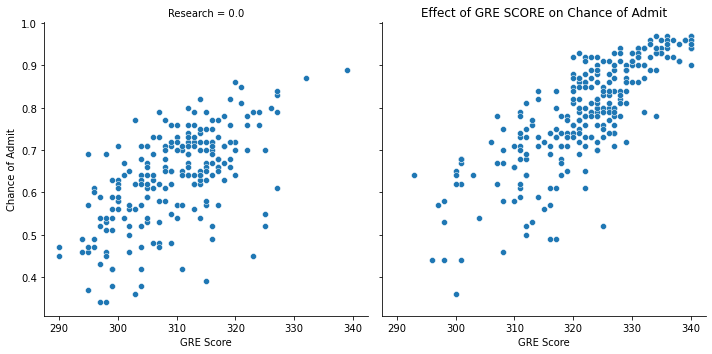

In [107]:
sns.relplot(x='GRE Score', y='Chance of Admit', col= 'Research', data=data)
plt.title('Effect of GRE SCORE on Chance of Admit')
plt.show()

Observation-:
1. Higher the GRE Score, Higher the chance of Admit
2. Total 280 person have done the research.
3. There are only 11 person from 155 who have chance of admit above 0.8 and who have not done the research <br>
this conclude that doing research increases the chance of Admit
4. Almost all the person who have GRE Score above 330 have done the research

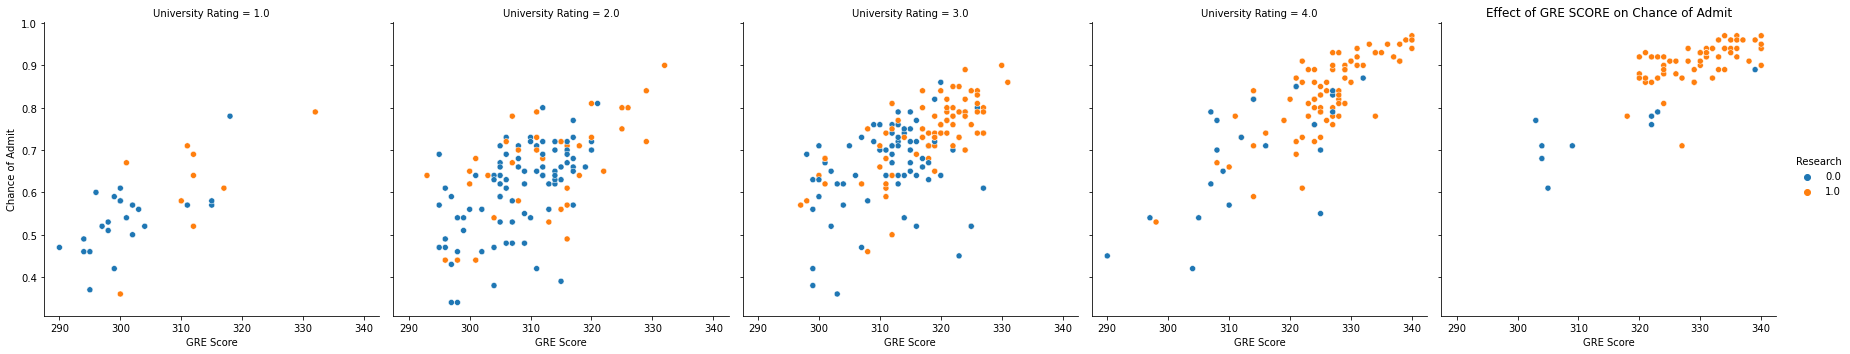

In [116]:
sns.relplot(x='GRE Score', y='Chance of Admit', col= 'University Rating',hue='Research', data=data)
plt.title('Effect of GRE SCORE on Chance of Admit')
plt.show()

Observation-:
1. Higher the GRE Score, Higher the chance of Admit of Higher University Rating <br>
2. Maximum person enrolled for university rating = 3

Analysis between TOEFL Score and Chance of Admit with considering Research and University Rating factors

In [118]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76


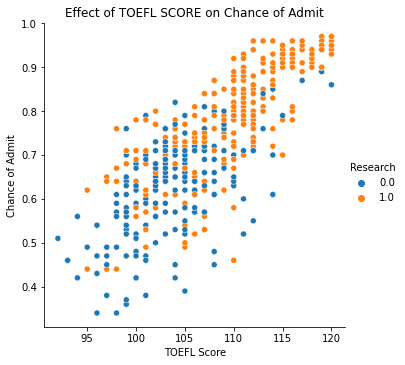

In [120]:
sns.relplot(x='TOEFL Score', y='Chance of Admit', hue= 'Research', data=data)
plt.title('Effect of TOEFL SCORE on Chance of Admit')
plt.show()

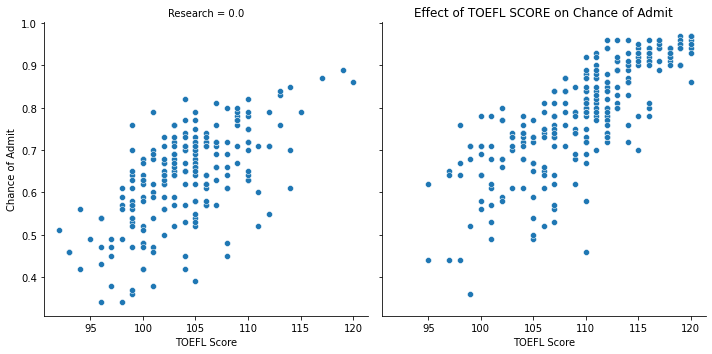

In [121]:
sns.relplot(x='TOEFL Score', y='Chance of Admit', col= 'Research', data=data)
plt.title('Effect of TOEFL SCORE on Chance of Admit')
plt.show()

Observation-:
1. Higher the TOEFL Score, Higher the chance of Admit
2. Total 280 person have done the research.
3. There are only 29 person from 189 who have TOEFL Score above 110 and who have not done the research <br>

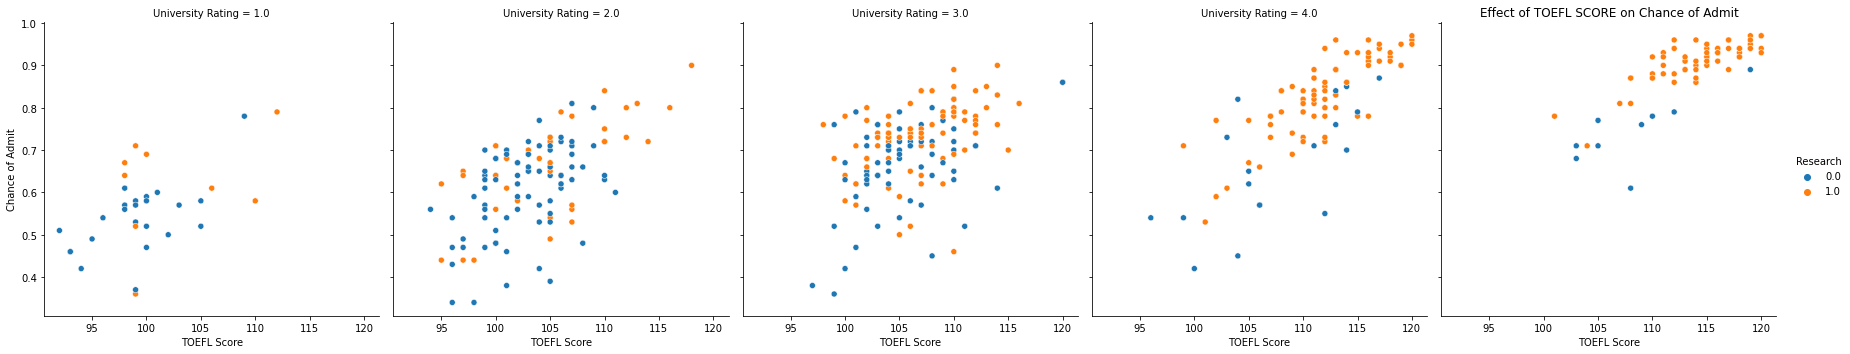

In [129]:
sns.relplot(x='TOEFL Score', y='Chance of Admit', col= 'University Rating',hue='Research', data=data)
plt.title('Effect of TOEFL SCORE on Chance of Admit')
plt.show()

Observation-:
1. Higher the TOEFL Score, Higher the chance of Admit of Higher University Rating <br>
2. Maximum person enrolled for university rating = 3

Analysis between SOP and Chance of Admit with considering Research and University Rating factors

In [130]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76


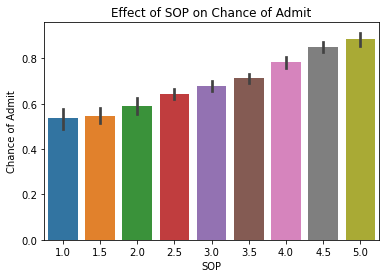

In [143]:
sns.barplot(x='SOP', y='Chance of Admit', data=data)
plt.title('Effect of SOP on Chance of Admit')
plt.show()

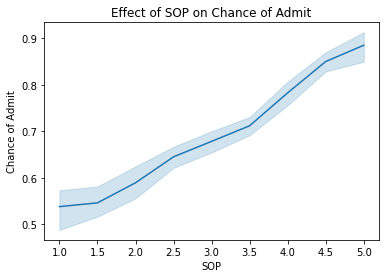

In [152]:
sns.lineplot(x='SOP', y='Chance of Admit', data=data)
plt.title('Effect of SOP on Chance of Admit')
plt.show()

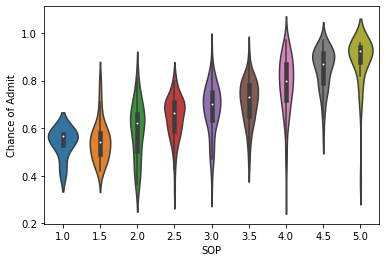

In [159]:
sns.violinplot(x='SOP', y='Chance of Admit', data=data)
plt.show()

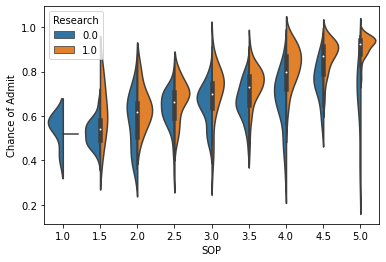

In [168]:
sns.violinplot(x='SOP', y='Chance of Admit', data=data, hue = 'Research', split=True)
plt.show()

Observation-:
1. Higher the SOP, Higher the chance of Admit
2. Maximum number of person got -: SOP -: 4.0

In [162]:
data['SOP'].value_counts() 

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

Analysis between LOR and Chance of Admit with considering Research and University Rating factors

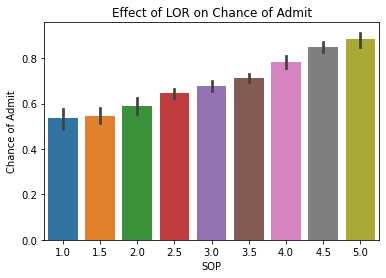

In [157]:
sns.barplot(x='SOP', y='Chance of Admit', data=data)
plt.title('Effect of LOR on Chance of Admit')
plt.show()

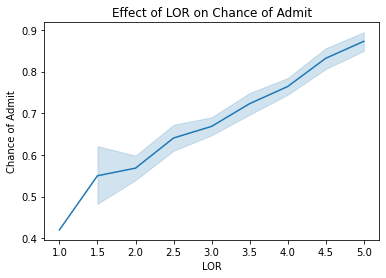

In [155]:
sns.lineplot(x='LOR', y='Chance of Admit', data=data)
plt.title('Effect of LOR on Chance of Admit')
plt.show()

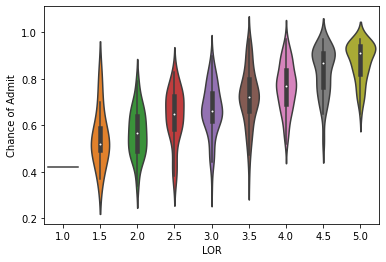

In [166]:
sns.violinplot(x='LOR', y='Chance of Admit', data=data)
plt.show()

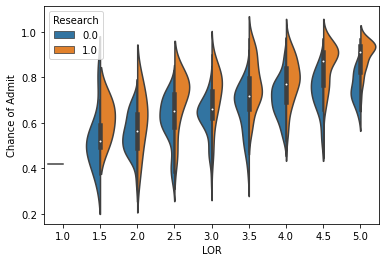

In [169]:
sns.violinplot(x='LOR', y='Chance of Admit', data=data, hue = 'Research', split=True)
plt.show()

Observation-:
1. Higher the SOP, Higher the chance of Admit
2. Maximum number of person got -: LOR -: 3.0

In [171]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


Analysis between CGPA and Chance of Admit with considering Research and University Rating Factors

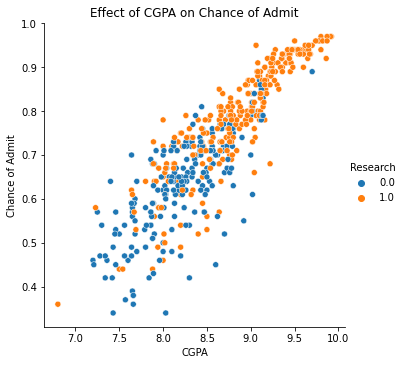

In [173]:
sns.relplot(x='CGPA', y='Chance of Admit', hue= 'Research', data=data)
plt.title('Effect of CGPA on Chance of Admit')
plt.show()

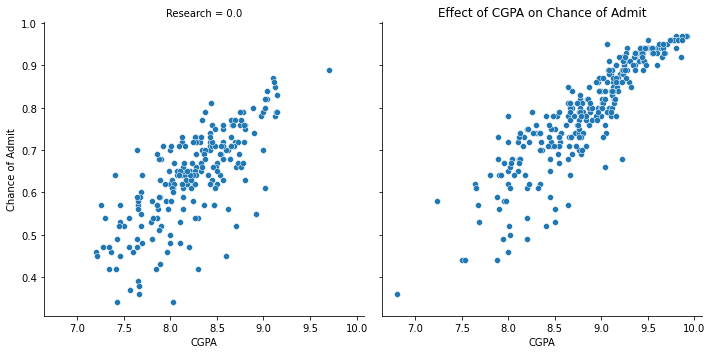

In [175]:
sns.relplot(x='CGPA', y='Chance of Admit', col= 'Research', data=data)
plt.title('Effect of CGPA on Chance of Admit')
plt.show()

Observation-:
1. Higher the CGPA, Higher the chance of Admit
2. If the Person has done the research he has higher chance of Admit

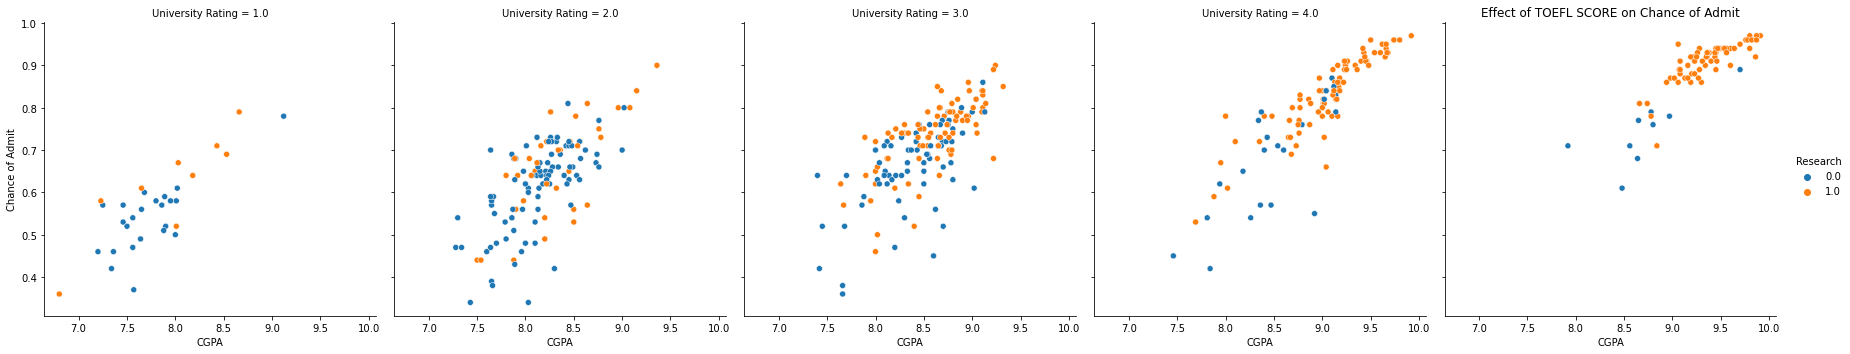

In [176]:
sns.relplot(x='CGPA', y='Chance of Admit', col= 'University Rating',hue='Research', data=data)
plt.title('Effect of TOEFL SCORE on Chance of Admit')
plt.show()

Observation-:
1. Higher the CGPA, Higher the chance of Admit of Higher University Rating <br>
2. Maximum person enrolled for university rating = 3

## Data Preprocessing

### Missing Value Detection and handling

In [178]:
## Checking Missing Value
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [184]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [190]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.572000,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.104207,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Treating Missing Values of GRE Score

In [180]:
data.loc[data['GRE Score'].isnull() == True]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
2,3.0,NaN,104.0,3.0,3.0,3.5,8.00,1.0,0.72
12,13.0,NaN,112.0,4.0,4.0,4.5,9.10,1.0,0.78
23,24.0,NaN,119.0,5.0,5.0,4.5,9.70,1.0,0.95
36,37.0,NaN,106.0,2.0,4.0,4.0,8.40,0.0,0.64
51,52.0,NaN,100.0,2.0,1.5,3.5,7.90,1.0,0.56
70,71.0,NaN,118.0,5.0,5.0,5.0,9.64,1.0,0.94
124,125.0,NaN,106.0,4.0,2.5,3.0,8.47,0.0,0.57
155,156.0,NaN,109.0,3.0,3.0,3.0,8.69,0.0,0.77
182,183.0,NaN,100.0,2.0,3.0,3.5,7.88,0.0,0.68
218,219.0,NaN,110.0,4.0,3.0,3.5,8.97,1.0,0.84


In [185]:
data.loc[data['GRE Score'].isnull()==True, 'GRE Score'] = 317.0

Treating Missing Values of TOEFL Score

In [188]:
data.loc[data['TOEFL Score'].isnull() == True]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
57,58.0,298.0,NaN,2.0,4.0,2.0,7.60,0.0,0.46
99,100.0,323.0,NaN,3.0,4.0,4.0,8.88,1.0,0.79
135,136.0,314.0,NaN,4.0,3.5,4.0,8.77,1.0,0.82
172,173.0,322.0,NaN,4.0,4.0,5.0,9.13,1.0,0.86
216,217.0,322.0,NaN,4.0,4.5,4.5,9.26,1.0,0.91
269,270.0,308.0,NaN,4.0,4.5,5.0,8.34,0.0,0.77
309,310.0,308.0,NaN,4.0,3.5,3.0,8.60,0.0,0.70
355,356.0,317.0,NaN,2.0,2.0,3.5,8.12,0.0,0.73
415,416.0,327.0,NaN,4.0,4.0,4.5,8.75,1.0,0.76
485,486.0,311.0,NaN,2.0,2.5,3.5,8.34,1.0,0.70


In [191]:
data.loc[data['TOEFL Score'].isnull()==True, 'TOEFL Score'] = 107.0

Treating Missing Values of University Rating	

In [192]:
data.loc[data['University Rating'].isnull() == True]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
6,7.0,321.0,109.0,NaN,3.0,4.0,8.20,1.0,0.75
45,46.0,322.0,110.0,NaN,5.0,4.0,9.10,1.0,0.88
85,86.0,319.0,103.0,NaN,4.5,3.5,8.66,0.0,0.76
123,124.0,308.0,108.0,NaN,3.5,3.5,8.22,0.0,0.61
175,176.0,320.0,111.0,NaN,4.5,3.5,8.87,1.0,0.85
221,222.0,316.0,110.0,NaN,3.5,4.0,8.56,0.0,0.75
248,249.0,324.0,110.0,NaN,3.5,4.0,8.87,1.0,0.80
283,284.0,321.0,111.0,NaN,2.5,3.0,8.90,1.0,0.80
315,316.0,308.0,104.0,NaN,2.5,3.0,8.07,0.0,0.65
345,346.0,316.0,98.0,NaN,1.5,2.0,7.43,0.0,0.49


In [193]:
data.loc[data['University Rating'].isnull()==True, 'University Rating'] = 3.0

In [194]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Outlier handling

In [195]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76


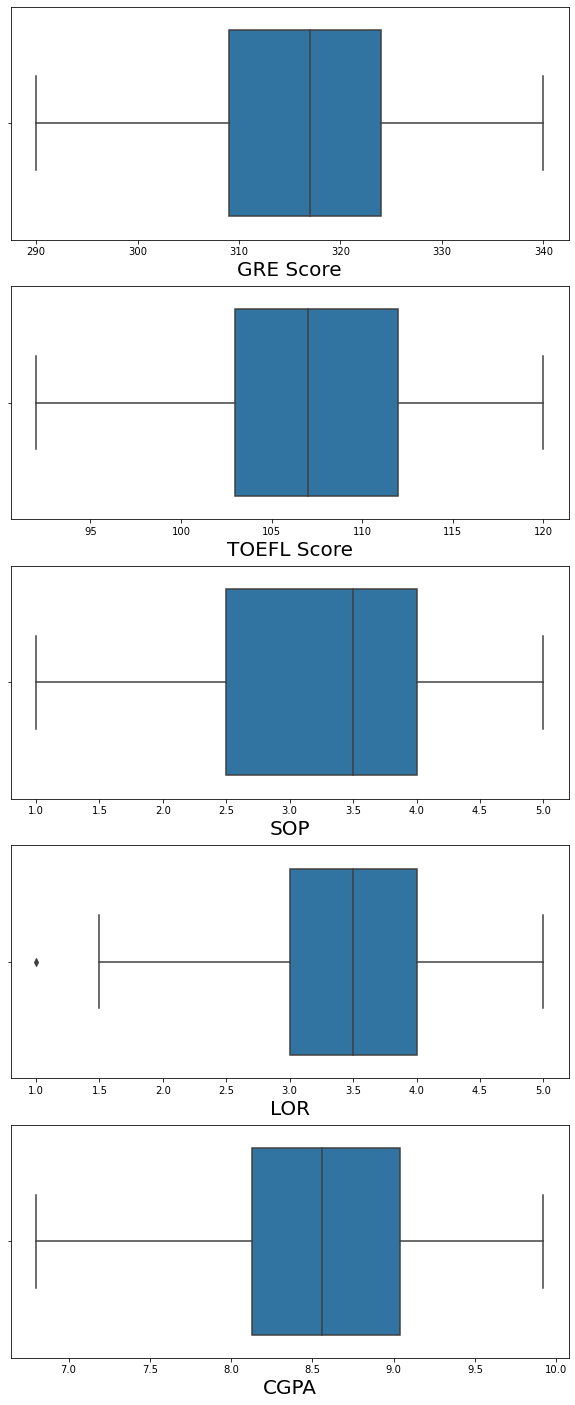

In [205]:
box=data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA']]
plt.figure(figsize=(10,30), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=6 :
        ax = plt.subplot(6,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
        

Removing the Outlier Data

In [206]:
data.LOR.value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

In [214]:
data = data[~(data['LOR'] == 1.0)]

In [215]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,317.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...,...
495,496.0,332.0,108.0,5.0,4.5,4.0,9.02,1.0,0.87
496,497.0,337.0,117.0,5.0,5.0,5.0,9.87,1.0,0.96
497,498.0,330.0,120.0,5.0,4.5,5.0,9.56,1.0,0.93
498,499.0,312.0,103.0,4.0,4.0,5.0,8.43,0.0,0.73


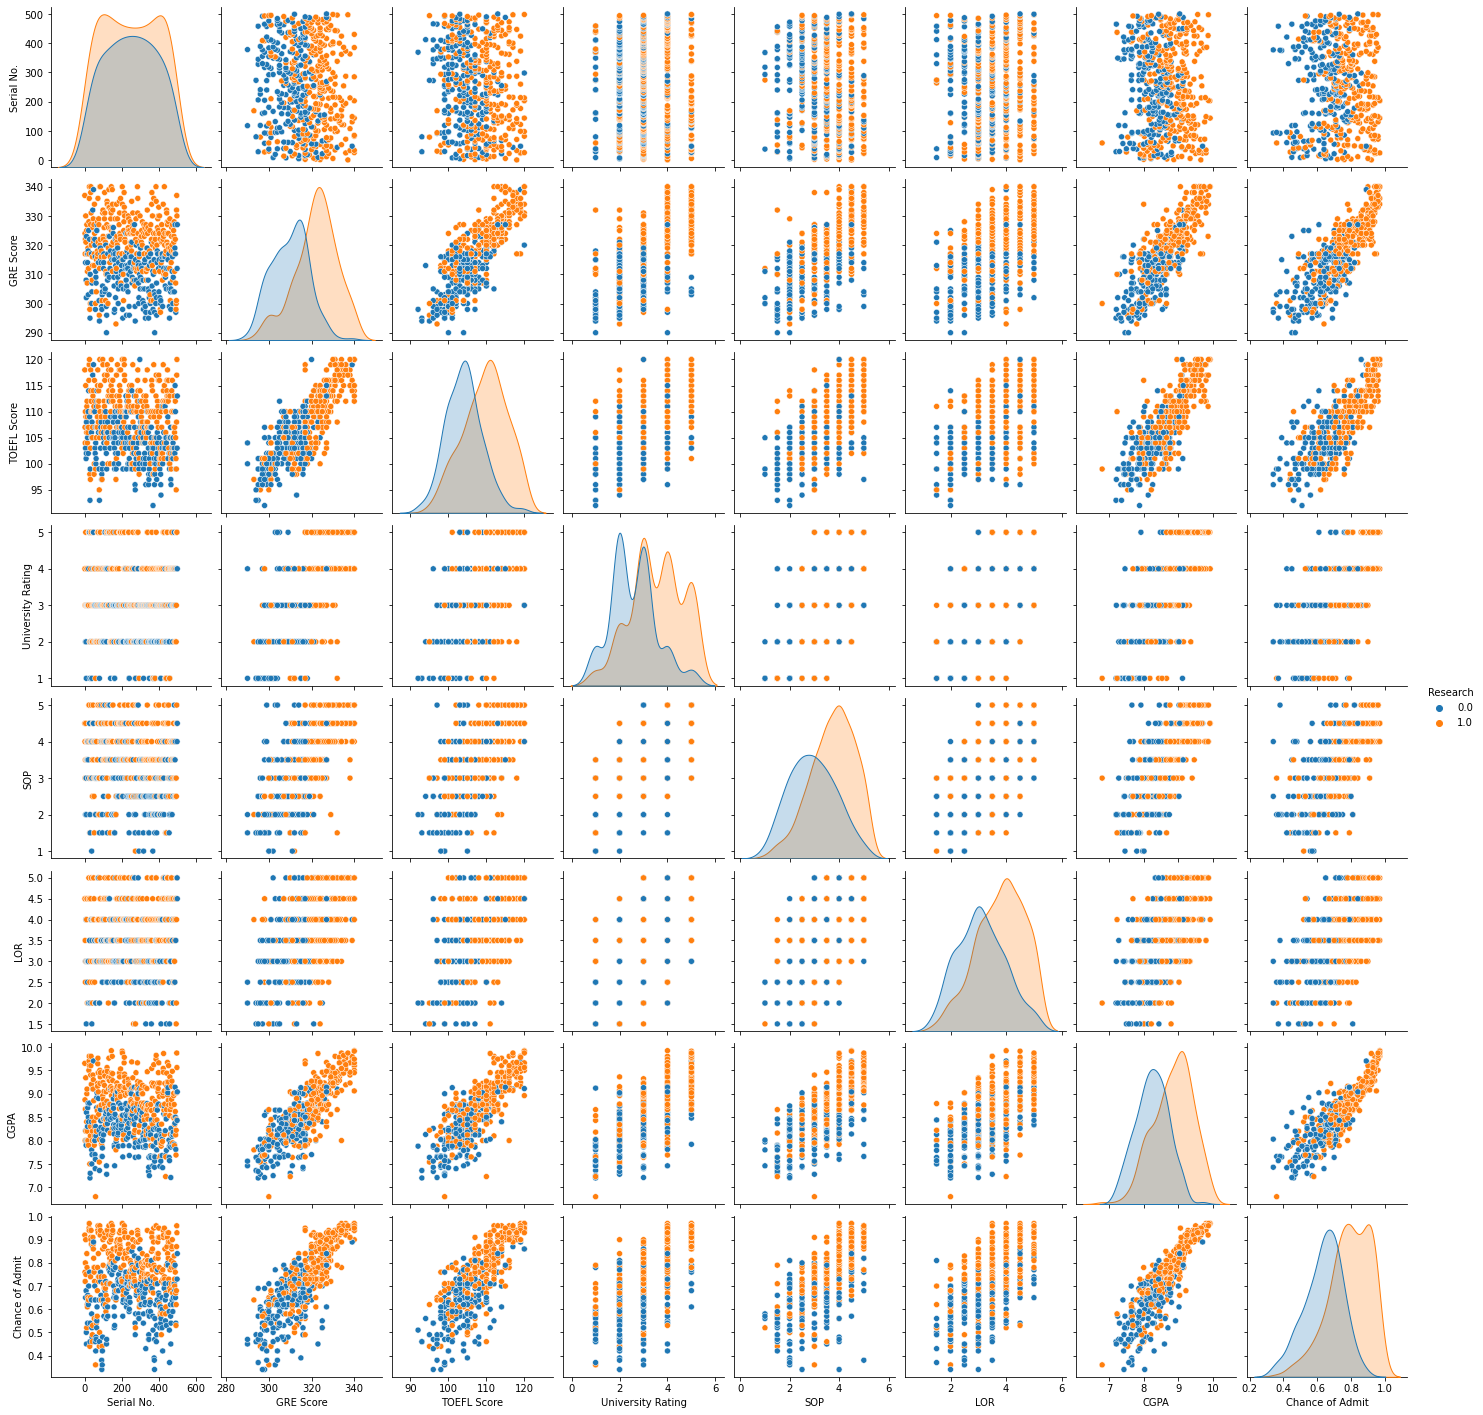

In [217]:
sns.pairplot(data=data,hue='Research')
plt.show()

## Feature Selection

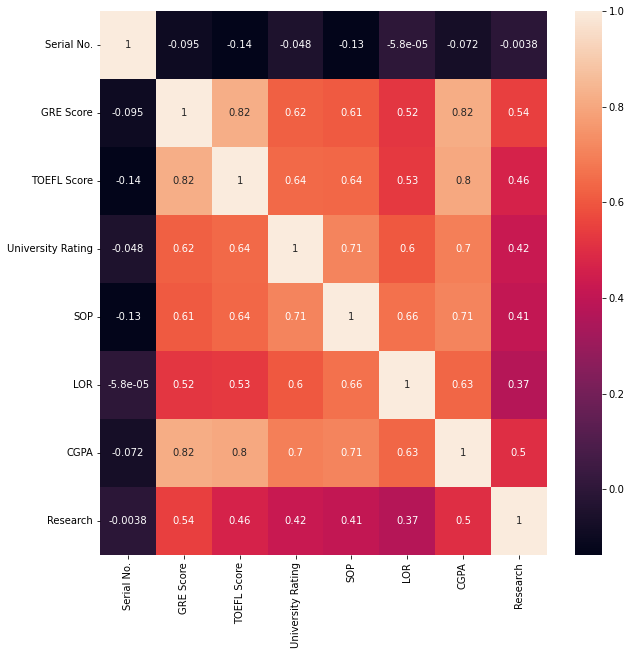

In [221]:
df_corr=data.drop('Chance of Admit', axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(df_corr.corr(), annot=True)
plt.show()

# Linear Regression

## Model Building

In [222]:
data.head(1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92


In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = data.drop(['TOEFL Score', 'University Rating', 'Research', 'Chance of Admit'], axis = 1)
y = data['Chance of Admit']


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.2, random_state=40)


In [257]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

LinearRegression()

In [258]:
print(Lin_reg.intercept_)
print(Lin_reg.coef_)

-1.5682841031440948
[8.44260350e-05 3.35485074e-03 1.01480831e-02 1.45689245e-02
 1.30711126e-01]


In [259]:
## Model Evaluation
y_train_predict=Lin_reg.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.8236207801435164